In [39]:
import pandas as pd
from CTL2.causal_tree_learn import CausalTree
from DGP.dgp2 import dgp2
from DGP.dgp1 import dgp1
from DGP.dgp3 import dgp3

from MC.mc1 import MC_MSE_1
from MC.mc2 import MC_MSE_2
import timeit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from CTL.causal_tree_learn import CausalTree as CT2
from random import random

from sklearn.metrics import mean_squared_error as mse

import pickle as pkl

In [2]:
def mcreps_mse_all(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    true = np.ones(reps)
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        x1 = x_test[:,0]
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ATE0.append(np.mean(ctl_predict[np.where(x1 < 0)]))
        MSEt.append(np.sum(np.square(np.subtract(y_test[:,0],ctl_predict)))/n)

    mse_total = np.sum(np.array(MSEt))/reps
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(np.array(ATE1),true))/reps
    bias2 = np.sum(np.add(np.array(ATE0), true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    return mse1, mse2, bias1, bias2, var1, var2, mse_total

In [14]:
def mcreps_mse_all2(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    MSEb = []
    MSEv = []
    true = np.ones(reps)
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        x1 = x_test[:,0]
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ATE0.append(np.mean(ctl_predict[np.where(x1 < 0)]))
        MSEt.append(np.sum(np.square(np.subtract(y_test[:,0],ctl_predict)))/n)
        MSEb.append(np.sum(np.subtract(ctl_predict,y_test[:,0]))/n)
        MSEv.append(np.var(ctl_predict))
    mse_total = np.sum(np.array(MSEt))/reps
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(np.array(ATE1),true))/reps
    bias2 = np.sum(np.add(np.array(ATE0), true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    mseb = np.sum(np.array(MSEb))/reps
    msev = np.sum(np.array(MSEv))/reps
    return mse1, mse2, bias1, bias2, var1, var2, mse_total, mseb, msev

In [40]:
def mcreps_mse_all3(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    MSEb = []
    MSEv = []
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        x1 = x_test[:,0]
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
    return y_test, ctl_predict

In [41]:
y_test, ctl_predict = mcreps_mse_all3(2,1000,0.5)


In [46]:
mse(y_test[:,0],ctl_predict)

4.571697329333143

In [45]:
mse(np.ones(500),ctl_predict)

3.4305968292146596

In [54]:
np.square(np.sum(np.subtract(ctl_predict,y_test[:,0]))/500) + np.var(ctl_predict)

2.4684525798341945

In [55]:
np.square(np.sum(np.subtract(ctl_predict,np.ones(500)))/500) + np.var(ctl_predict)

3.4305968292146596

In [5]:
MSE1 = []
MSE2 = []
BIAS1 = []
BIAS2 = []
VAR1 = []
VAR2 = []
MSE_TOTAL = []

test_sizes = [0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.75]

n = 1000
reps = 5

for size in test_sizes:
    mse1, mse2, bias1, bias2, var1, var2, mse_total = mcreps_mse_all(reps,n,size)    
    MSE1.append(mse1)
    MSE2.append(mse2)
    BIAS1.append(bias1)
    BIAS2.append(bias2)
    VAR1.append(var1)
    VAR2.append(var2)
    MSE_TOTAL.append(mse_total)

In [26]:
MSE1

[0.20918842675346544,
 0.08231144996454902,
 0.024166155193615917,
 0.15264497609890518,
 0.029790751122132524,
 0.07974552023068726,
 0.12233907714905737,
 0.12227584594424605]

In [42]:
df = pd.DataFrame([test_sizes, MSE1, MSE2, BIAS1, BIAS2, VAR1, VAR2]).transpose().set_index(0)
df.columns=['MSE1', 'MSE2', 'BIAS1', 'BIAS2', 'VAR1', 'VAR2']

with open('test1.pkl','wb') as f:
    pkl.dump(df, f)

In [43]:
with open('test1.pkl','rb') as f:
    df = pkl.load(f)

,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2
0,,,,,,
0.25,0.209188,0.132416,-0.328642,-0.304085,0.101183,0.039948
0.30,0.082311,0.052435,-0.199079,0.130386,0.042679,0.035434
0.35,0.024166,0.035527,-0.046789,0.139482,0.021977,0.016071
0.40,0.152645,0.022865,-0.341497,-0.106062,0.036025,0.011616
0.50,0.029791,0.046334,0.092194,0.092497,0.021291,0.037778
0.60,0.079746,0.137511,-0.257500,0.310775,0.013439,0.040930
0.70,0.122339,0.089367,-0.256446,0.270030,0.056574,0.016451
0.75,0.122276,0.044477,-0.296113,0.019025,0.034593,0.044115


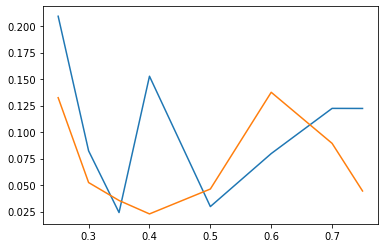

In [46]:
plt.plot(df['MSE1'])
plt.plot(df['MSE2'])

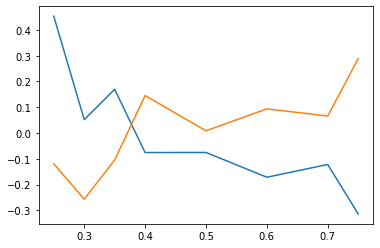

In [7]:
plt.plot(test_sizes, BIAS1)
plt.plot(test_sizes, BIAS2)

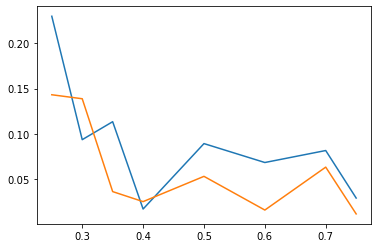

In [8]:
plt.plot(test_sizes, VAR1)
plt.plot(test_sizes, VAR2)

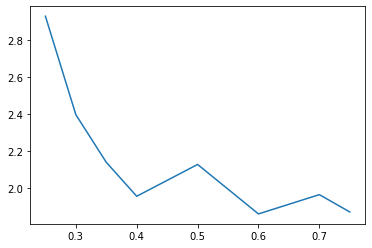

In [9]:
plt.plot(test_sizes, MSE_TOTAL)

In [55]:
test_sizes = [0.2, 0.25, 0.3, 0.4, 0.5]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
done
done
done


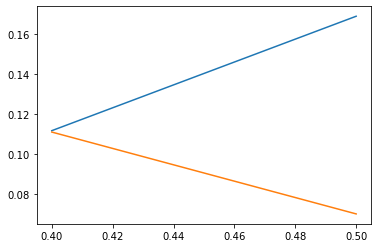

In [13]:
plt.plot(test_sizes, MSE1)
plt.plot(test_sizes, MSE2)

In [ ]:
test_sizes = [0.2, 0.3, 0.5, 0.7]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
